In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [2]:
df = pd.read_csv('Reviews.csv.zip')

### EDA

In [3]:
df.shape

(568454, 10)

In [4]:
df.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

#### Duplicates reviews

In [6]:
review_counts = df.Text.value_counts()
duplicate_reviews = review_counts[review_counts > 1]
len(duplicate_reviews)

58040

We have 58,040 duplicate reviews. Let's see if they have the same User Id.

In [7]:
reviews_with_same_userIds = df[df.duplicated(subset=['Text', 'ProductId', 'UserId'], keep=False)]
len(reviews_with_same_userIds)

2122

Out of the 58,040 duplicates, 2,122 have the same User Id. Let's remove the duplicates after the first from the dataset

In [8]:
df = df.drop_duplicates(subset=['Text', 'ProductId', 'UserId'], keep='first')
df.shape

(567145, 10)

Let's also review how many of the duplicate reviews are over 100 words :

In [9]:
review_counts = df.Text.value_counts()
duplicate_reviews = review_counts[review_counts > 1]
duplicate_reviews = pd.Series(duplicate_reviews.index)
duplicates_with_over_100_words = duplicate_reviews.apply(lambda x: len(x.split()) > 100)
duplicates_with_over_100_words.sum()

14188

In [10]:
df[df.Text ==duplicate_reviews[0]]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
10836,10837,B0034KP00S,A1TMAVN4CEM8U8,Gunner,1,1,5,1331251200,My 3rd favorite flavor,Diamond Almonds<br />Almonds are a good source...
11237,11238,B001KVPC0G,A1TMAVN4CEM8U8,Gunner,0,1,5,1332288000,I prefer the flavored,Diamond Almonds<br />Almonds are a good source...
25447,25448,B0051TPWUI,A1TMAVN4CEM8U8,Gunner,1,1,5,1331251200,My 3rd favorite flavor,Diamond Almonds<br />Almonds are a good source...
43460,43461,B001EQ4P2I,A1TMAVN4CEM8U8,Gunner,0,0,5,1336348800,My 7th favorite flavor,Diamond Almonds<br />Almonds are a good source...
43671,43672,B0049ZCF9G,A1TMAVN4CEM8U8,Gunner,1,1,5,1331251200,My 3rd favorite flavor,Diamond Almonds<br />Almonds are a good source...
51470,51471,B004HOLD92,A1TMAVN4CEM8U8,Gunner,0,0,5,1336348800,My 7th favorite flavor,Diamond Almonds<br />Almonds are a good source...
51754,51755,B0034KN2KS,A1TMAVN4CEM8U8,Gunner,0,0,5,1336348800,I prefer the flavored,Diamond Almonds<br />Almonds are a good source...
56016,56017,B004HONIMC,A1TMAVN4CEM8U8,Gunner,0,1,5,1332288000,I prefer the flavored,Diamond Almonds<br />Almonds are a good source...
74233,74234,B00473PNGW,A1TMAVN4CEM8U8,Gunner,0,0,5,1336348800,My 9th favorite flavor,Diamond Almonds<br />Almonds are a good source...
78118,78119,B004MC0CNW,A1TMAVN4CEM8U8,Gunner,1,1,5,1331251200,My 3rd favorite flavor,Diamond Almonds<br />Almonds are a good source...


Out of the 58,002 remaning duplicates, 14,188 of the reviews have over 100 words.

#### Keep only 3 features

In [11]:
df = df.loc[:,['ProductId','Text','Score']]

In [12]:
df.shape

(567145, 3)

In [13]:
df.isnull().sum()

ProductId    0
Text         0
Score        0
dtype: int64

We do not have missing values.

In [14]:
df.head(5)

,ProductId,Text,Score
0,B001E4KFG0,I have bought several of the Vitality canned d...,5
1,B00813GRG4,Product arrived labeled as Jumbo Salted Peanut...,1
2,B000LQOCH0,This is a confection that has been around a fe...,4
3,B000UA0QIQ,If you are looking for the secret ingredient i...,2
4,B006K2ZZ7K,Great taffy at a great price. There was a wid...,5


#### nbr of reviews per product

In [16]:
index_unique_prod = np.where(df.ProductId.value_counts().values == 1)[0].shape[0]

In [17]:
index_unique_prod

30416

In [18]:
len(set(df.ProductId)) - index_unique_prod

43842

We have 43842 products that has at least 2 reviews on the dataset.

In [19]:
np.where(df.ProductId.value_counts().values > 5)[0].shape[0]

17304

We have 17310 products on our dataset with more than 5 reviews.

In [20]:
np.where(df.ProductId.value_counts().values > 10)[0].shape[0]

9617

We have 9617 products on our dataset with more than 10 reviews.

In [21]:
np.where(df.ProductId.value_counts().values > 100)[0].shape[0]

843

We have 843 products on our dataset with more than 100 reviews.

In [22]:
nbr_reviews = [np.where(df.ProductId.value_counts().values > k)[0].shape[0] for k in range(10,1000,20)]

#### Deep dive in length of reviews

(0.0, 5000.0)

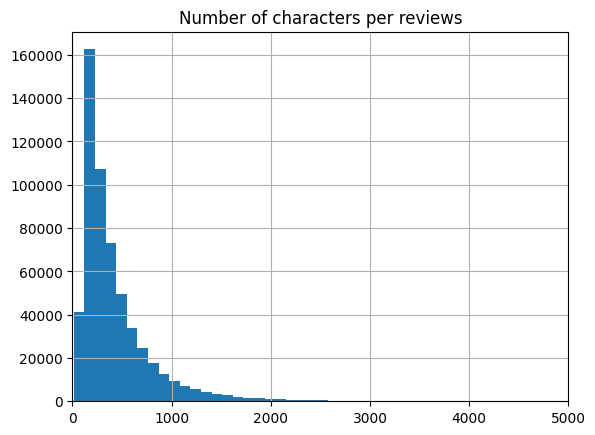

In [24]:
df.Text.str.len().hist(bins = 200)
plt.title('Number of characters per reviews')
plt.xlim(0,5000)

We can see that most of our reviews has less than 1000 characters. The majority of them has between 100 and 200 characters.

(0.0, 1000.0)

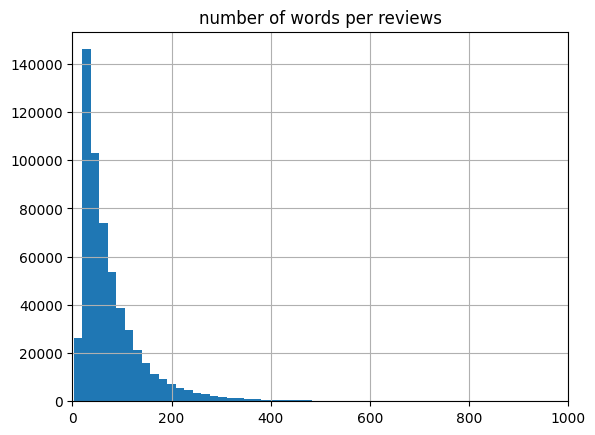

In [25]:
df.Text.str.split().map(lambda x : len(x)).hist(bins = 200)
plt.title('number of words per reviews')
plt.xlim(0,1000)

We can see that most of our reviews have less than 200 words. Most of them have around 40 words.

Text(0.5, 1.0, 'Average len of words per reviews')

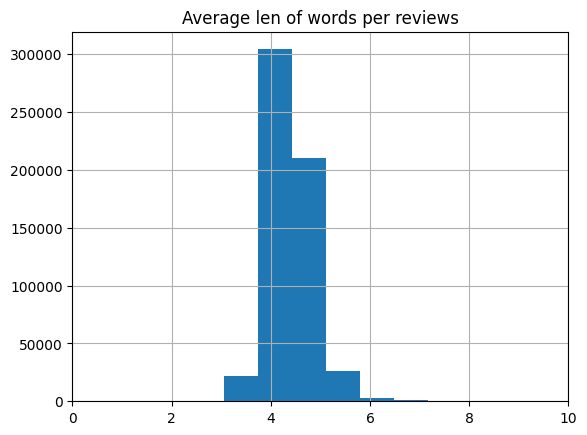

In [26]:
df.Text.str.split().apply(lambda x : [len(i) for i in x]).map(lambda x : np.mean(x)).hist(bins = 50)
plt.xlim(0,10)
plt.title('Average len of words per reviews')

We see that most of the reviews have a length of words between 3 and 6. This can be explained by the 'stop words' which are reducing the mean.

#### Stopwords and its occurences

In [27]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
from collections import defaultdict
new = df.Text.str.split()
new = new.values.tolist()
all_words = [word for i in new for word in i] # we get a list with all the words of all the reviews

dic = defaultdict(int)
for word in all_words:
  if word in stop:
    dic[word] +=1



<BarContainer object of 20 artists>

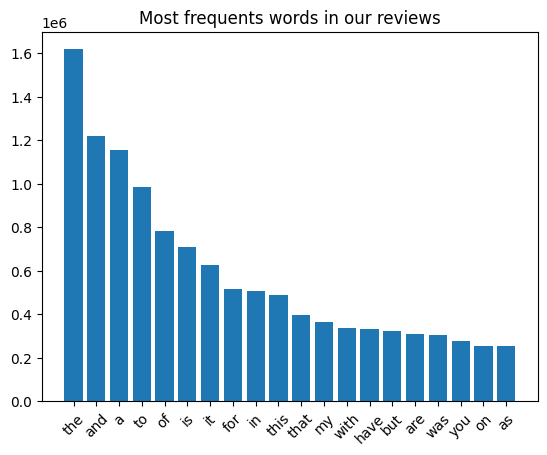

In [30]:
top = sorted(dic.items(), key = lambda x : x[1], reverse = True)[:20]
x,y = zip(*top)
plt.xticks(rotation = 45)
plt.title('Most frequents words in our reviews')
plt.bar(x,y)

#### Occurences without stopwords

We see how often are appearing stop words such as 'the','and',...

<Axes: >

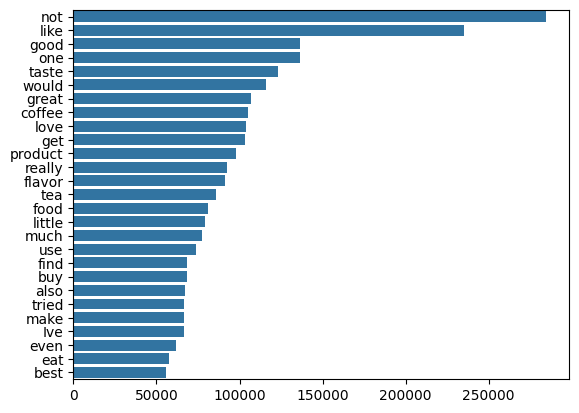

In [31]:
from collections import Counter
import re
counter = Counter(all_words)
most = counter.most_common()
x,y = [],[]
for word,count in most[:100]:
  if word.lower() not in stop :
    clean_word = re.sub(r'[^\w\s]', '', word) # remove punctuation
    if clean_word and len(clean_word) > 2:
      x.append(clean_word)
      y.append(count)

plt.title('Most frequent words that are not stopwords')
sns.barplot(x=y, y=x)



We see that we have a lot of positive words due to the fact that our dataset is imbalanced with a lot of good review with Words like 'good','great','love'.

#### Ngrams

In [32]:
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngram(all_words, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(all_words)
    bag_of_words = vec.transform(all_words)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:15]

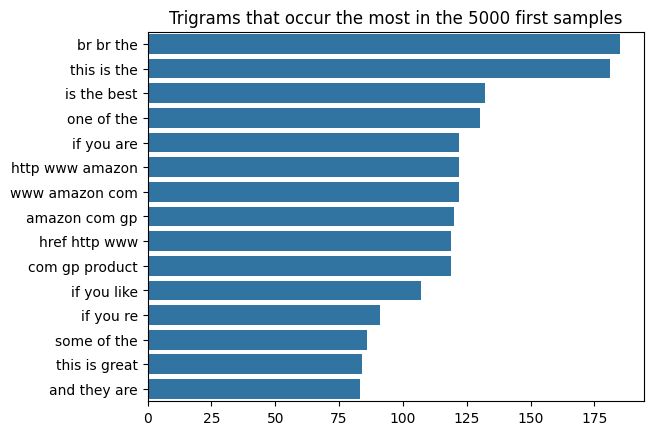

In [33]:
top_trigrams = get_top_ngram(df.Text.iloc[:5000], 3)
x,y = map(list,zip(*top_trigrams))
sns.barplot(x = y, y = x)
plt.title('Trigrams that occur the most in the 5000 first samples')
plt.show()

We see that we have a lot of reference to amazon and maybe the link of the product. We will see later why. We also have a lof of positive reviews patterns such as 'if you like', 'is the best', 'this is great'. We will have to do some data cleaning.

We split our data to train, validation and test using a groupshuffle to keep the same products on the same set.

#### Split the dataset into train val and test

In [34]:
from sklearn.model_selection import GroupShuffleSplit
splitter_temp = GroupShuffleSplit(test_size=.40, n_splits=1, random_state = 42)
split_temp = splitter_temp.split(df, groups=df['ProductId'])
train_inds, temp_inds = next(split_temp)

train = df.iloc[train_inds]
temp = df.iloc[temp_inds]



In [35]:
splitter_val = GroupShuffleSplit(test_size=.50, n_splits=1, random_state = 42)
split_val = splitter_val.split(temp, groups=temp['ProductId'])
val_inds, test_inds = next(split_val)

val = temp.iloc[val_inds]
test = temp.iloc[test_inds]

In [36]:
train.shape,val.shape,test.shape

((333029, 3), (115658, 3), (118458, 3))

In [37]:
X_train = train.drop(columns = 'Score')
y_train = train.Score

X_val = val.drop(columns = 'Score')
y_val = val.Score

X_test = test.drop(columns = 'Score')
y_test = test.Score

#### NER (Name Entity Recognition)

In [40]:
import spacy
nlp = spacy.load('en_core_web_sm')


In [41]:
processed_reviews = []
for review in X_train.Text[:5]:
  doc = nlp(review)
  processed_reviews.append(doc)

In [42]:
for x in processed_reviews:
  print([(y.text,y.label_) for y in (x.ents)])

[('Vitality', 'ORG'), ('Labrador', 'PERSON')]
[('Jumbo', 'PERSON'), ('Jumbo', 'PERSON')]
[('Robitussin', 'GPE'), ('the Root Beer Extract', 'ORG')]
[]
[('five pound', 'QUANTITY'), ('only two weeks', 'DATE')]


In [43]:
from spacy import displacy
for process_review in processed_reviews:
  displacy.render(process_review,style = 'ent')
  print('\n')

/usr/local/lib/python3.10/dist-packages/spacy/displacy/__init__.py:213: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


In [44]:
def ner(text):
    doc=nlp(text)
    return [X.label_ for X in doc.ents] # we just keep the labels

ent=X_train.Text[:100].apply(lambda x : ner(x)) # for each rows we get a list of labels
ent=[x for sub in ent for x in sub] # we get a single list with all the labels of all the rows

counter=Counter(ent)
count=counter.most_common()

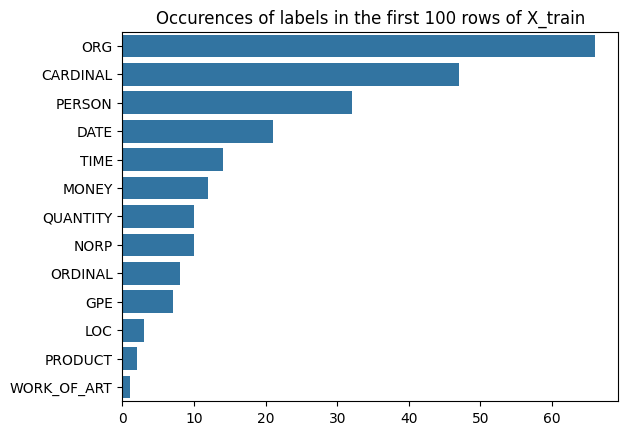

In [45]:
x,y=map(list,zip(*count))
sns.barplot(x=y,y=x)
plt.title('Occurences of labels in the first 100 rows of X_train')
plt.show()

We see that on reviews, we have a lof of companies that are stated, probably corresponding to the company that is selling the product.

In [46]:
def ner_label(text,ent):
  doc = nlp(text)
  return [X.text for X in doc.ents if X.label_ == ent]



<Axes: title={'center': 'Companies that are stated in the first 1000 reviews of the train set'}>

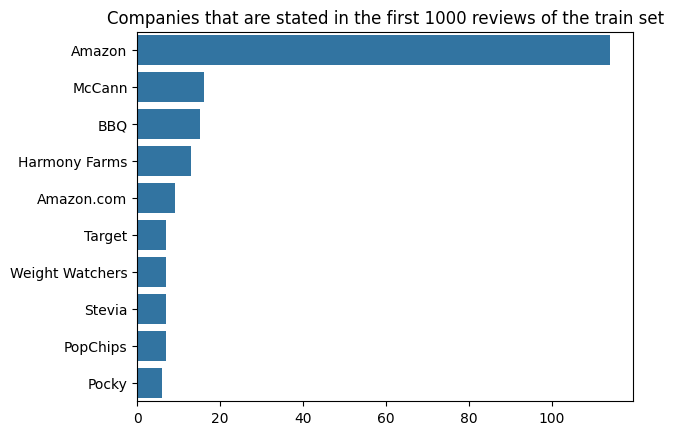

In [47]:
org = X_train.Text[:1000].apply(lambda x :ner_label(x,'ORG'))
org = [i for x in org for i in x]
counter = Counter(org)
x,y = map(list,zip(*counter.most_common(10)))
plt.title('Companies that are stated in the first 1000 reviews of the train set')
sns.barplot(x = y,y = x)

<Axes: title={'center': 'Cardinality that is stated in the first 1000 reviews of the train set'}>

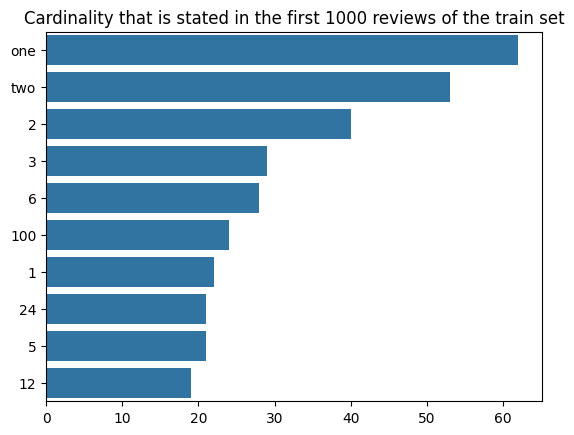

In [48]:
card = X_train.Text[:1000].apply(lambda x :ner_label(x,'CARDINAL'))
card = [i for x in card for i in x]
counter = Counter(card)
x,y = map(list,zip(*counter.most_common(10)))
plt.title('Cardinality that is stated in the first 1000 reviews of the train set')
sns.barplot(x = y,y = x)

<Axes: title={'center': 'People or brand that are stated in the first 1000 reviews of the train set'}>

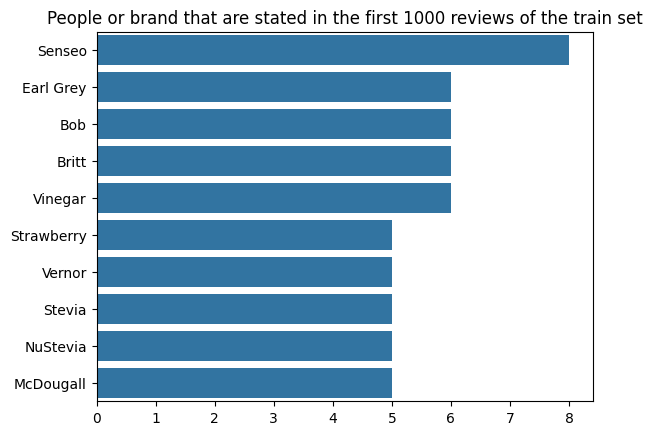

In [49]:
person = X_train.Text[:1000].apply(lambda x :ner_label(x,'PERSON'))
person = [i for x in person for i in x]
counter = Counter(person)
x,y = map(list,zip(*counter.most_common(10)))
plt.title('People or brand that are stated in the first 1000 reviews of the train set')
sns.barplot(x = y,y = x)

In [50]:
! pip install contractions

### Preprocessing

#### Cleaning of the word + corpus (list with all the cleaned words).

In [51]:
stop.update(['come','got','however','think','box','still','want','always','eating','brand','though','put','sure','using','eat','bag','stuff',"try",'bought','mix','think','way','since','like','one','one','would','get','also','time','use','amazon','product','make','good','taste','find','tried','food','taste','flavor','could','found','used','made'])

In [52]:
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from tqdm import tqdm
import contractions
import string
nltk.download('punkt')
nltk.download('wordnet')
our_stopwords = ['amazon','like','just','because','only','there','were','one','would','product','get','all','had','more','other','some','out','from','than','the','and','this','that','with','for','have','they','you','was','are','these','them','can','will','when','has','but']
def preprocess_news(df):
  ### function to clean each review
    corpus=[]
    lem=WordNetLemmatizer()
    for review in tqdm(df.Text, desc = 'preprocessing'):
      review = contractions.fix(review) # it removes all contractions (i'm -> i am)
      clean_words = []
      for w in word_tokenize(review): # each review is converted to a list of words. We do not have punctuations in the word (it is great, but -> 'it','is','great','but')
        if (w.lower() not in stop and len(w)> 2):
          no_punct = [char for char in w if char not in string.punctuation and not char.isdigit()]
          words_wo_punct = ''.join(no_punct).lower()
          if words_wo_punct and len(words_wo_punct) > 2 and words_wo_punct not in stop:
            words_wo_punct = lem.lemmatize(words_wo_punct)  # lemmatize : reduce each word into a common base (cats -> cat) based on the dictionary form
            clean_words.append(words_wo_punct)

      corpus.append(clean_words)

    return corpus

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [53]:
corpus = preprocess_news(X_train[:50000]) # we get a list of each words preprocessed of each reviews

preprocessing: 100%|██████████| 50000/50000 [00:56<00:00, 877.54it/s] 


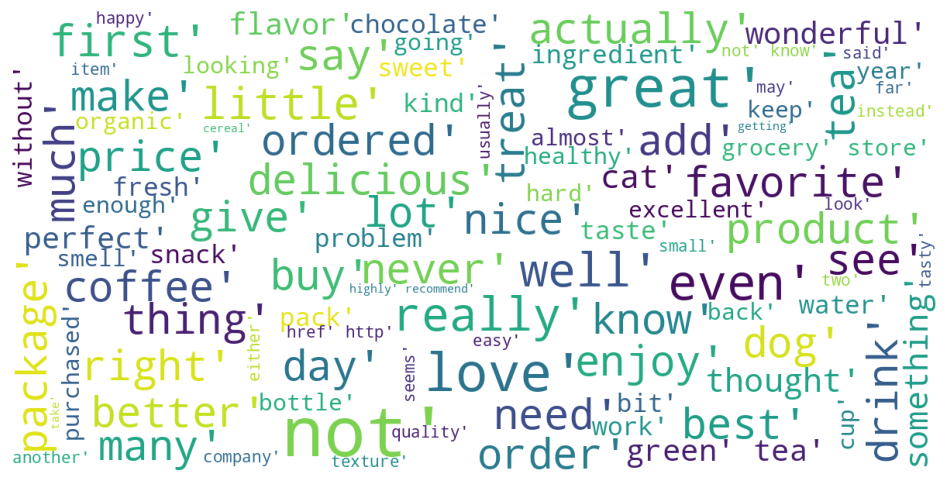

In [ ]:
from wordcloud import WordCloud

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stop,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data)) # generates the wordcloud based on text

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(corpus)

### Model

#### Baseline models supervised

##### Sparse matrix

In [ ]:
y_corpus = y_train[:50000]

In [ ]:
from scipy.sparse import csr_matrix
from sklearn.linear_model import LinearRegression

rows, cols, data = [], [], []
for i, document in enumerate(bow_corpus):
    for word_index, word_count in document:
        rows.append(i)
        cols.append(word_index)
        data.append(word_count)

# Create a sparse matrix
num_docs = len(bow_corpus)
num_words = len(set(cols))
X_sparse = csr_matrix((data, (rows, cols)), shape=(num_docs, num_words))
# it creates a matrix where features are each words and each rows corresponds to a review


In [ ]:
X_sparse.shape

(50000, 43333)

We have too many features. We need to proceed to feature selection. We remove features that have less than 100 non zeros values.

In [ ]:
threshold = 100
non_zero_counts = X_sparse.getnnz(axis=0) # we get an array with the number of zeros per column
columns_to_keep = (non_zero_counts >= threshold).reshape(-1)
X_sparse_filtered = X_sparse[:, columns_to_keep]
X_sparse_filtered = csr_matrix(X_sparse_filtered)

In [ ]:
X_sparse_filtered.shape

(50000, 2052)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_sparse_filtered, y_corpus, test_size=0.2, random_state=42)

##### logisticregression

In [ ]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

class_report_lr = classification_report(y_test,y_pred)
print(class_report_lr)

              precision    recall  f1-score   support

           1       0.60      0.55      0.57       968
           2       0.29      0.21      0.24       569
           3       0.31      0.20      0.24       775
           4       0.39      0.20      0.26      1423
           5       0.78      0.92      0.84      6265

    accuracy                           0.69     10000
   macro avg       0.47      0.42      0.43     10000
weighted avg       0.64      0.69      0.65     10000



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


We get an accuracy of 0.69 for our baseline model.
Precisions and recalls of each labels are very poor except the label 5 as it is the predominant one of our dataset.

##### knn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           1       0.31      0.26      0.29       968
           2       0.20      0.11      0.14       569
           3       0.20      0.10      0.13       775
           4       0.24      0.08      0.12      1423
           5       0.70      0.89      0.78      6265

    accuracy                           0.61     10000
   macro avg       0.33      0.29      0.29     10000
weighted avg       0.53      0.61      0.55     10000



We get very poor results : accuracy of 0.61 and precisions and recalls very low for the first four classes.

##### dummyclassifier

In [ ]:
from sklearn.dummy import DummyClassifier
strat = ['most_frequent','prior','stratified','uniform']
for strategy in strat:
  dummy_clf = DummyClassifier(strategy = strategy)
  dummy_clf.fit(X_train,y_train)
  y_pred_dumm = dummy_clf.predict(X_test)
  print(f'Strategy = {strategy} : ')
  print(classification_report(y_test,y_pred_dumm))
  print('\n')

Strategy = most_frequent : 
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       968
           2       0.00      0.00      0.00       569
           3       0.00      0.00      0.00       775
           4       0.00      0.00      0.00      1423
           5       0.63      1.00      0.77      6265

    accuracy                           0.63     10000
   macro avg       0.13      0.20      0.15     10000
weighted avg       0.39      0.63      0.48     10000



Strategy = prior : 
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       968
           2       0.00      0.00      0.00       569
           3       0.00      0.00      0.00       775
           4       0.00      0.00      0.00      1423
           5       0.63      1.00      0.77      6265

    accuracy                           0.63     10000
   macro avg       0.13      0.20      0.15     10000
weighted avg       0.39    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

- Strategy = 'most_frequent' : As we are predicting all our samples at the most frequent score, we get an accuracy of 0.63 but precision and recall of 0 for all first 4 classes.
- Strategy = 'prior' : As we are predicting all our samples at the most frequent score, we get an accuracy of 0.63 but precision and recall of 0 for all first 4 classes.
- Strategy = 'stratified' : As we are predicting samples based on the distribution of the target variable, we do not get 0s for precisions and recall. We get an accuracy of 0.42 lower than for the previous two strategies.
- Strategy = 'uniform' : As we predict each sample randomly we get almost the same precisions and recalls for each labels. However, as we have a majority of label 5 in our dataset, we get a very low accuracy of 0.2

#### bag of words

In [54]:
import gensim
dic=gensim.corpora.Dictionary(corpus) # assign an id to each unique word of corpus
bow_corpus = [dic.doc2bow(doc) for doc in corpus]

In [55]:
bow_indices = [[tup[0] for tup in item] for item in bow_corpus] # list of list of indices

In [57]:
from keras.preprocessing.sequence import pad_sequences
max_sequences_length = max(len(seq) for seq in bow_indices)
bow_indices_padded = pad_sequences(bow_indices,maxlen = max_sequences_length, padding = 'post')
# each list has the same length. We add 0s at the end of each list ('post')

In [64]:
from sklearn.model_selection import train_test_split
X_train_forword2,X_test_forword2,y_train_forword2,y_test_forword2 = train_test_split(bow_indices_padded,y_train[:50000], test_size = 0.2, random_state = 42)

In [66]:
y_train_encoded_forword2 = pd.get_dummies(y_train_forword2)

In [67]:
y_test_encoded_forword2 = pd.get_dummies(y_test_forword2)

In [68]:
max_index = np.max(np.max(bow_indices_padded))

In [69]:
vocab_size = max_index + 1

In [71]:
max_sequences_length

510

#### Tfidf

In [88]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range = (1,1), stop_words = 'english',lowercase = True, min_df = 0.01, max_df = 0.7)
X_train_tfidf = vectorizer.fit_transform(train.Text[:50000]).toarray()
X_train_tfidf = X_train_tfidf.reshape(X_train_tfidf.shape[0], 1, X_train_tfidf.shape[1]) # reshape tfidf for lstm input

In [91]:
X_test_tfidf = vectorizer.transform(test.Text[:10000]).toarray()
X_test_tfidf = X_test_tfidf.reshape(X_test_tfidf.shape[0], 1, X_test_tfidf.shape[1])

In [92]:
X_train_tfidf.shape, X_test_tfidf.shape

((50000, 1, 590), (10000, 1, 590))

In [93]:
y_train_tfidf = pd.get_dummies(train.Score[:50000])
y_test_tfidf = pd.get_dummies(test.Score[:10000])

#### LSTM model using Tfidf

In [94]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout
model = Sequential([LSTM(128,input_shape = (1,X_train_tfidf.shape[2]),return_sequences = True),
                    LSTM(128,return_sequences = True),
                    LSTM(128),
                    Dense(20, activation = 'relu'),
                    Dense(5,activation = 'softmax')])

In [95]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [96]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 3, restore_best_weights = True)
model.fit(X_train_tfidf,y_train_tfidf, epochs = 20, batch_size = 64, validation_split = 0.2, callbacks = [early_stopping])

Epoch 1/20
625/625 [==============================] - 13s 13ms/step - loss: 0.9907 - accuracy: 0.6512 - val_loss: 0.9580 - val_accuracy: 0.6495
Epoch 2/20
625/625 [==============================] - 7s 11ms/step - loss: 0.9230 - accuracy: 0.6633 - val_loss: 0.9411 - val_accuracy: 0.6522
Epoch 3/20
625/625 [==============================] - 7s 11ms/step - loss: 0.8792 - accuracy: 0.6760 - val_loss: 0.8988 - val_accuracy: 0.6668
Epoch 4/20
625/625 [==============================] - 7s 11ms/step - loss: 0.8552 - accuracy: 0.6872 - val_loss: 0.8903 - val_accuracy: 0.6702
Epoch 5/20
625/625 [==============================] - 7s 11ms/step - loss: 0.8480 - accuracy: 0.6894 - val_loss: 0.8918 - val_accuracy: 0.6685
Epoch 6/20
625/625 [==============================] - 6s 10ms/step - loss: 0.8423 - accuracy: 0.6910 - val_loss: 0.8879 - val_accuracy: 0.6701
Epoch 7/20
625/625 [==============================] - 6s 10ms/step - loss: 0.8369 - accuracy: 0.6938 - val_loss: 0.8901 - val_accuracy: 0.667

In [97]:
model.evaluate(X_test_tfidf, y_test_tfidf)

313/313 [==============================] - 1s 4ms/step - loss: 0.9225 - accuracy: 0.6622


[0.9225494265556335, 0.6621999740600586]

In [131]:
predictions = model.predict(X_test_tfidf)


313/313 [==============================] - 1s 4ms/step


In [133]:
y_pred_tfidf = np.argmax(predictions, axis = 1) + 1

In [145]:
from sklearn.metrics import classification_report
print(classification_report(y_pred_tfidf,y_test_forword2))

              precision    recall  f1-score   support

           1       0.08      0.09      0.08       842
           2       0.01      0.06      0.02       127
           3       0.04      0.08      0.05       432
           4       0.05      0.12      0.08       630
           5       0.80      0.63      0.70      7969

    accuracy                           0.52     10000
   macro avg       0.20      0.20      0.19     10000
weighted avg       0.65      0.52      0.57     10000



In [143]:
np.where(y_pred_tfidf == 3)[0][:10]

array([ 17, 103, 109, 110, 118, 177, 179, 197, 235, 255])

In [113]:
model.predict(X_test_tfidf)[0]

313/313 [==============================] - 1s 4ms/step


array([2.4455544e-04, 1.2936692e-04, 9.7183971e-04, 2.2297846e-02,
       9.7635639e-01], dtype=float32)

#### Lime for LSTM model

In [77]:
! pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=3854b14519e23d03a43852657fb8ea41213382b6144f39d6284b99af8cec53ae
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [125]:
from lime import lime_tabular
explainer = lime_tabular.RecurrentTabularExplainer(X_train_tfidf, training_labels=y_train_tfidf, feature_names=vectorizer.get_feature_names_out(),
                                                   discretize_continuous=True,
                                                   class_names=['1', '2','3','4','5'],
                                                   discretizer='decile')

In [144]:
exp = explainer.explain_instance(X_test_tfidf[17], model.predict, num_features=10)
exp.show_in_notebook()

157/157 [==============================] - 1s 4ms/step


#### LDA model (baseline unsupervised)

In [ ]:
import gensim
dic=gensim.corpora.Dictionary(corpus) # assign an id to each unique word of corpus
bow_corpus = [dic.doc2bow(doc) for doc in corpus] # we create a bag of words. We have a list of tuples for each row with (ID of the word, occurences of the word)

In [ ]:
lda_model = gensim.models.LdaMulticore(bow_corpus,
                                   num_topics = 5,
                                   id2word = dic,
                                   passes = 5,
                                   workers = 2) # We use LDAMulticore as we have a large dataset ( it parallelizes the process)
# LDA models are used to get the main topics of our data.
# For each topic, we get the top words and the probability for this word to appear in the given topic
# based on all the possible words of this topic
lda_model.show_topics()

[(0,
  '0.034*"dog" + 0.030*"not" + 0.020*"treat" + 0.016*"love" + 0.012*"cat" + 0.007*"great" + 0.006*"day" + 0.006*"give" + 0.005*"chew" + 0.005*"hair"'),
 (1,
  '0.017*"not" + 0.011*"sauce" + 0.011*"oil" + 0.010*"noodle" + 0.009*"ginger" + 0.009*"hot" + 0.008*"water" + 0.008*"add" + 0.008*"soup" + 0.007*"great"'),
 (2,
  '0.032*"not" + 0.012*"chocolate" + 0.012*"sugar" + 0.011*"great" + 0.009*"snack" + 0.009*"love" + 0.009*"sweet" + 0.007*"calorie" + 0.007*"cereal" + 0.006*"milk"'),
 (3,
  '0.048*"tea" + 0.037*"coffee" + 0.033*"not" + 0.021*"drink" + 0.013*"cup" + 0.009*"green" + 0.008*"strong" + 0.008*"great" + 0.007*"love" + 0.006*"water"'),
 (4,
  '0.046*"not" + 0.008*"price" + 0.007*"store" + 0.007*"great" + 0.007*"buy" + 0.006*"order" + 0.005*"really" + 0.005*"even" + 0.005*"much" + 0.005*"first"')]

We get 5 main topics :
-  one seems to be about dog food
-  one seams to be about tea and drinks
-  one seems to be about food with chocolate
-  one seems to be about coffee with a chocolate flavor maybe
- one seems to be about snackfood such as chips

In [ ]:
from gensim.models.coherencemodel import CoherenceModel
coherence_model = CoherenceModel(model=lda_model, texts=corpus, dictionary=dic, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print("Coherence Score:", coherence_score)

Coherence Score: 0.4745264203419266


We see that many positive words are very frequent in the dataset such as 'delicious', 'love', 'good',...
we also have many words from fooding products such as 'flavor','taste','ingredients',...

In [ ]:
perplexity = lda_model.log_perplexity(bow_corpus)
perplexity

-7.703118880355149